In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [2]:
data = pd.read_csv("train.csv")

columns_to_drop = [col for col in data.columns if col.startswith("Constituency")] + ['Candidate']

data.drop(columns_to_drop, axis=1, inplace=True)

data['Criminal Case'].fillna(data['Criminal Case'].mean(), inplace=True)

def convert_to_numeric(value):
    if "Crore+" in value:
        return int(value.replace("Crore+", "")) * 10000000
    elif "Lac+" in value:
        return int(value.replace("Lac+", "")) * 100000
    elif "Thou+" in value:
        return int(value.replace("Thou+", "")) * 1000
    elif "Hund+" in value:
        return int(value.replace("Hund+", "")) * 100
    else:
        if value != '0':
            print(value)
        return int(value)
    
data['Total Assets'] = data['Total Assets'].apply(convert_to_numeric)
data['Liabilities'] = data['Liabilities'].apply(convert_to_numeric)

data

,ID,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,0,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,1,BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,2,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,3,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,4,BJP,2,20000000,6100000,WEST BENGAL,8th Pass
...,...,...,...,...,...,...,...
2054,2054,CPI,1,6100000,1000000,KERALA,Graduate Professional
2055,2055,INC,0,20000000,800000,RAJASTHAN,10th Pass
2056,2056,BJP,0,130000000,8500000,UTTAR PRADESH,Graduate
2057,2057,NCP,1,250000000,9400000,MAHARASHTRA,12th Pass


In [3]:
data['Total Assets'] = data['Total Assets'].fillna(data['Total Assets'].mean())
data['Liabilities'] = data['Liabilities'].fillna(data['Liabilities'].mean())

min_max_scaler = MinMaxScaler()

standard_scaler = StandardScaler()

features_to_scale = ['Total Assets', 'Liabilities','Criminal Case']  

data[features_to_scale] = min_max_scaler.fit_transform(data[features_to_scale])
data['Criminal Case'] = 1 - data['Criminal Case']
data = pd.get_dummies(data, columns=['Party', 'state'])

# test_df = pd.get_dummies(test_df, columns=['Party', 'state'])
# data.drop('state', axis=1, inplace=True)
# label_encoder = LabelEncoder()

# data['Education'] = label_encoder.fit_transform(data['Education'])

data

,ID,Criminal Case,Total Assets,Liabilities,Education,Party_AAP,Party_AIADMK,Party_AITC,Party_BJD,Party_BJP,...,state_ODISHA,state_PUDUCHERRY,state_PUNJAB,state_RAJASTHAN,state_SIKKIM,state_TAMIL NADU,state_TRIPURA,state_UTTAR PRADESH,state_UTTARAKHAND,state_WEST BENGAL
0,0,0.954023,0.166535,0.002270,8th Pass,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1.000000,0.000789,0.000000,12th Pass,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2,1.000000,0.005525,0.000250,Post Graduate,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1.000000,0.007103,0.000272,Post Graduate,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,0.977011,0.001579,0.000692,8th Pass,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,2054,0.988506,0.000481,0.000114,Graduate Professional,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2055,2055,1.000000,0.001579,0.000091,10th Pass,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2056,2056,1.000000,0.010260,0.000965,Graduate,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2057,2057,0.988506,0.019732,0.001067,12th Pass,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X = data.drop(['Education','ID'], axis=1)
y = data['Education']
# y = pd.get_dummies(y, columns=['Education'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

print(y_test)

model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 92)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
# Maximum Accuracy: 0.23786407766990292, Random State 1: 64, Random State 2: 10

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 50)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
#  Maximum Accuracy: 0.25485436893203883, Random State 1: 92, Random State 2: 50

from sklearn.neighbors import KNeighborsClassifier
import numpy as np
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(X_train, y_train)
X_test = np.array(X_test)
X_test = np.ascontiguousarray(X_test)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

1459    Post Graduate
1968    Post Graduate
1460         Graduate
195         Doctorate
1791         Graduate
            ...      
292     Post Graduate
557         10th Pass
103         12th Pass
832         10th Pass
1015    Post Graduate
Name: Education, Length: 412, dtype: object
                       precision    recall  f1-score   support

            10th Pass       0.09      0.09      0.09        47
            12th Pass       0.10      0.09      0.10        76
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        16
            Doctorate       0.00      0.00      0.00        12
             Graduate       0.26      0.29      0.27       109
Graduate Professional       0.18      0.16      0.17        64
             Literate       0.33      0.50      0.40         2
               Others       0.00      0.00      0.00         3
        Post Graduate       0.26      0.30      0.28        82

             accura

c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

                       precision    recall  f1-score   support

            10th Pass       0.00      0.00      0.00        47
            12th Pass       0.00      0.00      0.00        76
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        16
            Doctorate       0.00      0.00      0.00        12
             Graduate       0.29      0.66      0.40       109
Graduate Professional       0.33      0.06      0.11        64
             Literate       0.00      0.00      0.00         2
               Others       0.00      0.00      0.00         3
        Post Graduate       0.25      0.43      0.31        82

             accuracy                           0.27       412
            macro avg       0.09      0.11      0.08       412
         weighted avg       0.18      0.27      0.19       412

                       precision    recall  f1-score   support

            10th Pass       0.00      0.00      0.0

c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [5]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score

# max_accuracy = 0
# max_accuracy_rand1 = None
# max_accuracy_rand2 = None

# for rand1 in range(10, 101):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand1)
#     for rand2 in range(10, 101):
#         model= RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 19)
#         model.fit(X_train,y_train)
#         y_pred=model.predict(X_test)
# #         print(classification_report(y_test, y_pred))
#         accuracy = accuracy_score(y_test, y_pred)
#         if accuracy > 0.27:
#             print(f"Random State 1: {rand1}, Random State 2: {rand2}, Accuracy: {accuracy}")
#             print(classification_report(y_test, y_pred))
#         if accuracy > max_accuracy:
#             max_accuracy = accuracy
#             max_accuracy_rand1 = rand1
#             max_accuracy_rand2 = rand2

# print(f"Maximum Accuracy: {max_accuracy}, Random State 1: {max_accuracy_rand1}, Random State 2: {max_accuracy_rand2}")

#  rand1 = 79 , rand2 = 46 Decision Tree
#  rand1 = 19 , rand2 = 41 Random Forest

In [6]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

base_model = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=19)

random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_model = RandomForestClassifier(**best_params, random_state=19)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

            10th Pass       0.00      0.00      0.00        47
            12th Pass       0.19      0.04      0.07        76
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        16
            Doctorate       0.00      0.00      0.00        12
             Graduate       0.28      0.80      0.42       109
Graduate Professional       0.23      0.05      0.08        64
             Literate       0.00      0.00      0.00         2
               Others       0.00      0.00      0.00         3
        Post Graduate       0.28      0.23      0.25        82

             accuracy                           0.27       412
            macro avg       0.10      0.11      0.08       412
         weighted avg       0.20      0.27      0.18       412



c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\l

In [7]:
import numpy as np

param_grid = {
    'C': np.logspace(-3, 3, 7), 
    'gamma': np.logspace(-3, 3, 7), 
    'kernel': ['rbf'] 
}

base_model = SVC(kernel='rbf', random_state=0)

random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid, n_iter=100, cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_model = SVC(**best_params, random_state=0)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 49 is smaller than n_iter=100. Running 49 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


                       precision    recall  f1-score   support

            10th Pass       0.00      0.00      0.00        47
            12th Pass       0.00      0.00      0.00        76
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        16
            Doctorate       0.00      0.00      0.00        12
             Graduate       0.28      0.70      0.40       109
Graduate Professional       0.27      0.05      0.08        64
             Literate       0.00      0.00      0.00         2
               Others       0.00      0.00      0.00         3
        Post Graduate       0.26      0.38      0.31        82

             accuracy                           0.27       412
            macro avg       0.08      0.11      0.08       412
         weighted avg       0.17      0.27      0.18       412



c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sk

In [8]:
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25],  
    'weights': ['uniform', 'distance'],  
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  
    'p': [1, 2]  
}

classifier = KNeighborsClassifier()

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

best_model = KNeighborsClassifier(**best_params)
best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

                       precision    recall  f1-score   support

            10th Pass       0.14      0.11      0.12        47
            12th Pass       0.19      0.14      0.16        76
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        16
            Doctorate       0.00      0.00      0.00        12
             Graduate       0.30      0.37      0.33       109
Graduate Professional       0.14      0.16      0.15        64
             Literate       0.00      0.00      0.00         2
               Others       0.00      0.00      0.00         3
        Post Graduate       0.28      0.39      0.32        82

             accuracy                           0.24       412
            macro avg       0.10      0.12      0.11       412
         weighted avg       0.21      0.24      0.22       412



c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [       nan 0.19246201        nan 0.19610758        nan 0.19853182
        nan 0.20035369        nan 0.19184858        nan 0.20036106
        nan 0.19852077        nan 0.20035553        nan 0.20276872
        nan 0.19913788 0.19853551 0.19246201 0.20218292 0.19610758
 0.21491572 0.19853182 0.21492493 0.20217187 0.21553836 0.19306438
 0.21373123 0.20096896 0.21979184 0.19730496 0.22040158 0.19974763
 0.21312333 0.20216266 0.20828774 0.19913788 0.19853551 0.19246201
 0.20218108 0.19610758 0.21552178 0.19853182 0.21492493 0.20217187
 0.21614258 0.19245648 0.21736944 0.20096896 0.21857788 0.19791287
 0.22222529 0.20035553 0.2106954  0.20276872 0.20646403 0.19913788
        nan 0.19246201        nan 0.19610758        nan 0.19853182
        nan 0.20035369        nan 0.19184858        nan 0.20036106
        nan 0.

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import BernoulliNB

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False],  # Whether to learn class prior probabilities
    'binarize': [None, 0.0, 0.1, 0.5],  # Threshold for binarizing input features
    # You can add more parameters here
}

# Instantiate the Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=bernoulli_nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Instantiate the Bernoulli Naive Bayes classifier with the best parameters
best_model = BernoulliNB(alpha=best_params['alpha'], fit_prior=best_params['fit_prior'], binarize=best_params['binarize'])

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict labels for the test data
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


Best parameters: {'alpha': 2.0, 'binarize': 0.0, 'fit_prior': True}
                       precision    recall  f1-score   support

            10th Pass       0.20      0.09      0.12        47
            12th Pass       0.14      0.08      0.10        76
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.00      0.00      0.00        16
            Doctorate       0.00      0.00      0.00        12
             Graduate       0.26      0.39      0.31       109
Graduate Professional       0.24      0.08      0.12        64
             Literate       0.00      0.00      0.00         2
               Others       0.00      0.00      0.00         3
        Post Graduate       0.21      0.43      0.28        82

             accuracy                           0.22       412
            macro avg       0.10      0.11      0.09       412
         weighted avg       0.20      0.22      0.19       412



c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-pac

In [10]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0],
    'fit_prior': [True, False],  # Whether to learn class prior probabilities
    'class_prior': [None, [0.2, 0.8], [0.3, 0.7]],  # Prior probabilities for each class
    # You can add more parameters here
}

# Instantiate the Categorical Naive Bayes classifier
categorical_nb = CategoricalNB()

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=categorical_nb, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters:", best_params)

# Instantiate the Categorical Naive Bayes classifier with the best parameters
best_model = CategoricalNB(alpha=best_params['alpha'], fit_prior=best_params['fit_prior'], class_prior=best_params['class_prior'])

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict labels for the test data
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics

c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics

c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics

Best parameters: {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
                       precision    recall  f1-score   support

            10th Pass       0.06      0.04      0.05        47
            12th Pass       0.13      0.09      0.11        76
             5th Pass       0.00      0.00      0.00         1
             8th Pass       0.06      0.06      0.06        16
            Doctorate       0.00      0.00      0.00        12
             Graduate       0.27      0.29      0.28       109
Graduate Professional       0.18      0.06      0.09        64
             Literate       0.07      0.50      0.12         2
               Others       1.00      0.33      0.50         3
        Post Graduate       0.23      0.41      0.29        82

             accuracy                           0.20       412
            macro avg       0.20      0.18      0.15       412
         weighted avg       0.19      0.20      0.18       412



c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
100 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\saksham agarwal\appdata\local\programs\python\python39\lib\site-packages\sklearn\naive_bayes.py", line 1391, in fit
    return super().fit(X, y, sample_weight=sample_weight)
  File "c:\users\saksham agarwal\appda

In [11]:
test_df = pd.read_csv("test.csv")
columns_to_drop = [col for col in test_df.columns if col.startswith("Constituency")] + ['Candidate']
test_df.drop(columns_to_drop, axis=1, inplace=True)
test_df['Criminal Case'].fillna(test_df['Criminal Case'].mean(), inplace=True)
test_df['Total Assets'] = test_df['Total Assets'].apply(convert_to_numeric)
test_df['Liabilities'] = test_df['Liabilities'].apply(convert_to_numeric)
test_df['Total Assets'] = test_df['Total Assets'].fillna(test_df['Total Assets'].mean())
test_df['Liabilities'] = test_df['Liabilities'].fillna(test_df['Liabilities'].mean())
test_df[features_to_scale] = min_max_scaler.fit_transform(test_df[features_to_scale])
test_df = pd.get_dummies(test_df, columns=['Party', 'state'])
id_df=test_df['ID']
test_df = test_df.drop(['ID'], axis=1)

# test_df['Education_labels'] = label_encoder.fit_transform(test_df['Education'])
prediction=best_model.predict(test_df)
submission_df = pd.DataFrame({'ID': id_df, 'Education':prediction})
submission_df.to_csv('submission.csv', index=False, encoding='utf-8')

In [12]:
data = pd.read_csv("train.csv")

columns_to_drop = [col for col in data.columns if col.startswith("Constituency")] + ['Candidate']+ ['ID']

data.drop(columns_to_drop, axis=1, inplace=True)

data['Criminal Case'].fillna(data['Criminal Case'].mean(), inplace=True)

def convert_to_numeric(value):
    if "Crore+" in value:
        return int(value.replace("Crore+", "")) * 10000000
    elif "Lac+" in value:
        return int(value.replace("Lac+", "")) * 100000
    elif "Thou+" in value:
        return int(value.replace("Thou+", "")) * 1000
    elif "Hund+" in value:
        return int(value.replace("Hund+", "")) * 100
    else:
        if value != '0':
            print(value)
        return int(value)
    
data['Total Assets'] = data['Total Assets'].apply(convert_to_numeric)
data['Liabilities'] = data['Liabilities'].apply(convert_to_numeric)
df=data
df.head()

,Party,Criminal Case,Total Assets,Liabilities,state,Education
0,DMK,4,2110000000,20000000,TAMIL NADU,8th Pass
1,BJP,0,10000000,0,MADHYA PRADESH,12th Pass
2,INC,0,70000000,2200000,KARNATAKA,Post Graduate
3,BJP,0,90000000,2400000,BIHAR,Post Graduate
4,BJP,2,20000000,6100000,WEST BENGAL,8th Pass


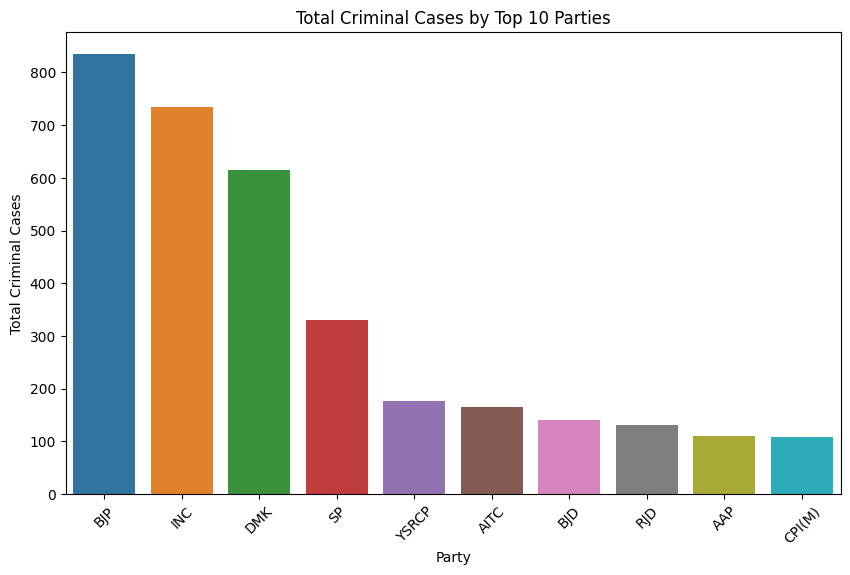

In [13]:
party_criminal_cases = df.groupby('Party')['Criminal Case'].sum().reset_index()

top_10_parties = party_criminal_cases.sort_values(by='Criminal Case', ascending=False).head(10)

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Party', y='Criminal Case', data=top_10_parties)
plt.title('Total Criminal Cases by Top 10 Parties')
plt.xlabel('Party')
plt.ylabel('Total Criminal Cases')
plt.xticks(rotation=45)


plt.show()


In [14]:
party_totals = df.groupby('Party').sum()
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]
styled_party_totals = party_totals.style.apply(highlight_max, axis=0)

styled_party_totals


C:\Users\Saksham Agarwal\AppData\Local\Temp\ipykernel_1336\4268266783.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  party_totals = df.groupby('Party').sum()


,Criminal Case,Total Assets,Liabilities
Party,,,
AAP,111,4299742000,604570000
AIADMK,13,1436500000,318000000
AITC,165,4305300000,837190000
BJD,141,3718400000,383027000
BJP,835,81929745000,11551792100
CPI,4,46000000,3300000
CPI(M),109,354551000,36903000
DMK,614,8278900000,1561246000
INC,735,72614100000,22652010000


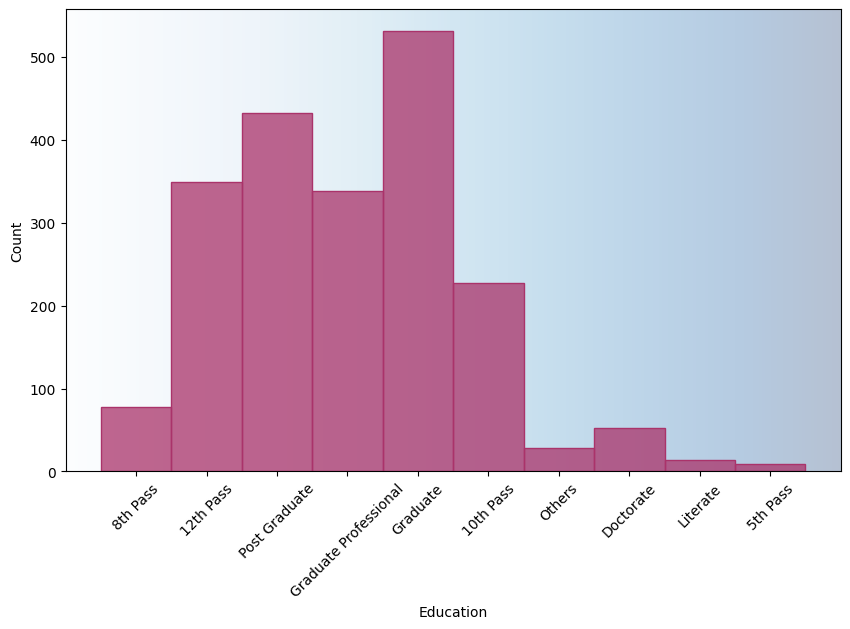

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Education'], kde=False, color='#AA336A', edgecolor='#AA336A')

gradient = np.linspace(0, 1, 256).reshape(1, -1)
plt.imshow(gradient, aspect='auto', cmap='Blues', extent=plt.gca().get_xlim() + plt.gca().get_ylim(), alpha=0.3)

plt.xticks(rotation=45)
plt.show()

C:\Users\Saksham Agarwal\AppData\Local\Temp\ipykernel_1336\2746979541.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  others_count = criminal_case_counts[7:].sum()


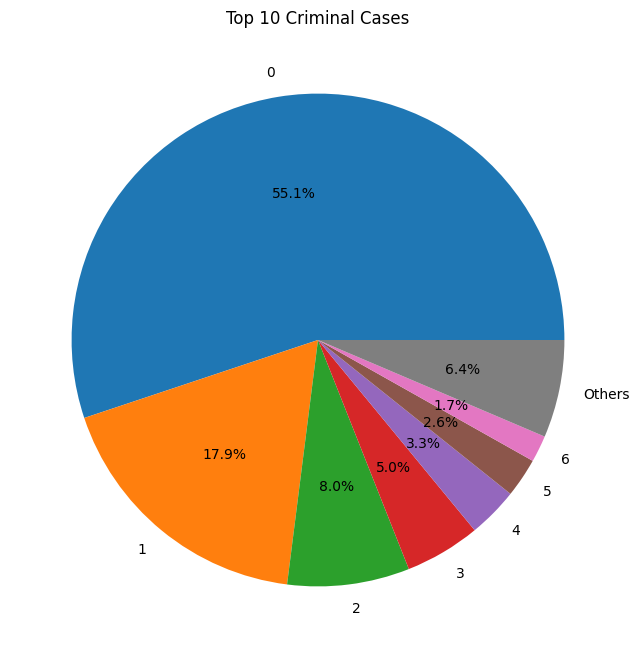

In [16]:
criminal_case_counts = df['Criminal Case'].value_counts()

top_10_cases = criminal_case_counts.head(7)
others_count = criminal_case_counts[7:].sum()
top_10_cases['Others'] = others_count

plt.figure(figsize=(8, 8))
plt.pie(top_10_cases, labels=top_10_cases.index, autopct='%1.1f%%')
plt.title('Top 10 Criminal Cases')
plt.show()


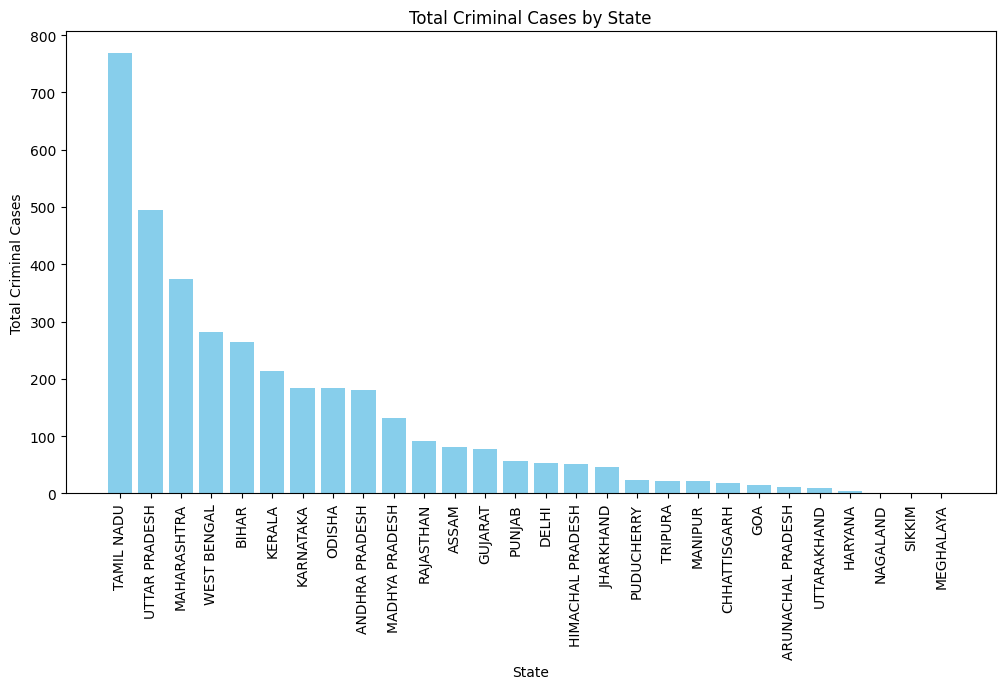

In [17]:
state_criminal_cases = df.groupby('state')['Criminal Case'].sum().reset_index()

state_criminal_cases = state_criminal_cases.sort_values(by='Criminal Case', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(state_criminal_cases['state'], state_criminal_cases['Criminal Case'], color='skyblue')
plt.title('Total Criminal Cases by State')
plt.xlabel('State')
plt.ylabel('Total Criminal Cases')
plt.xticks(rotation=90)  
plt.show()


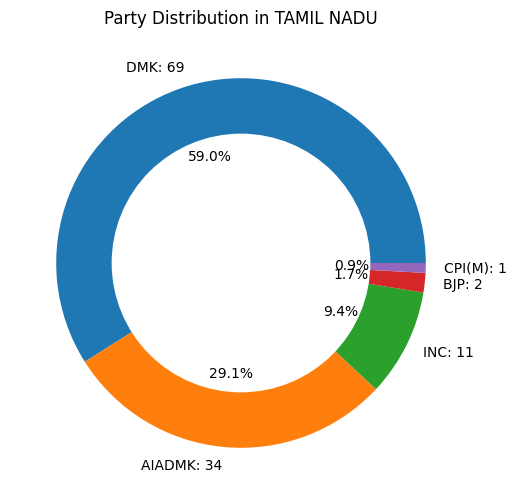

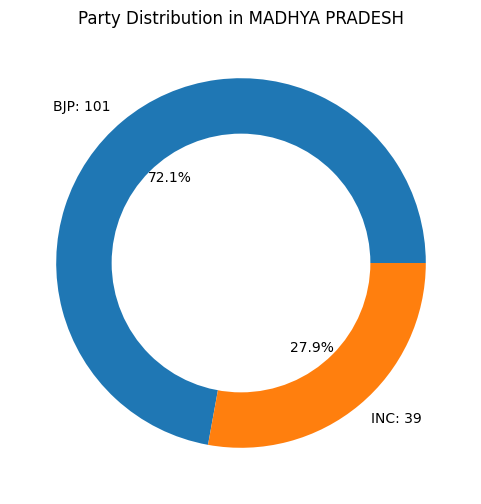

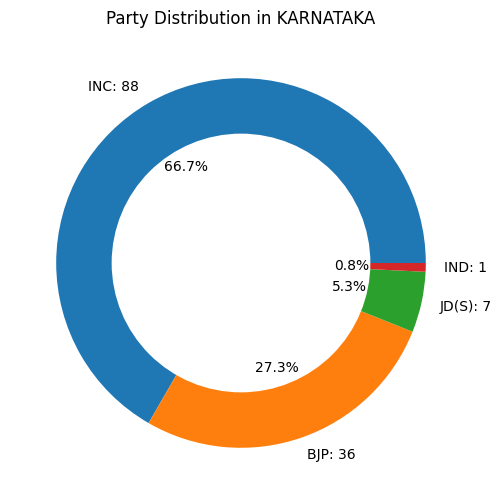

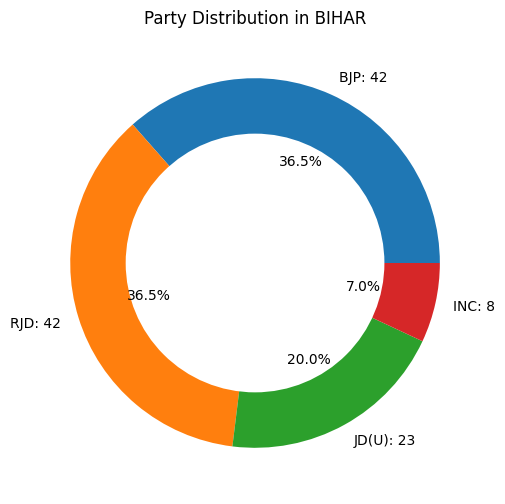

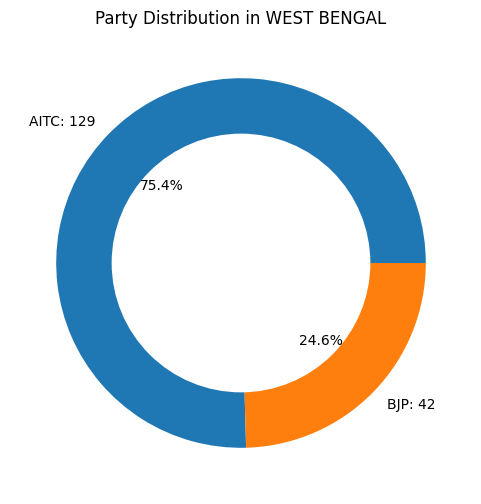

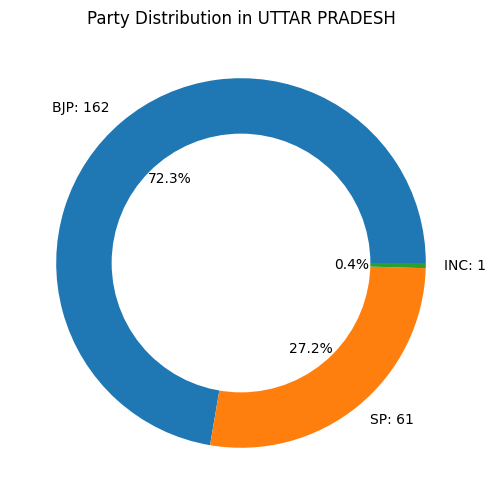

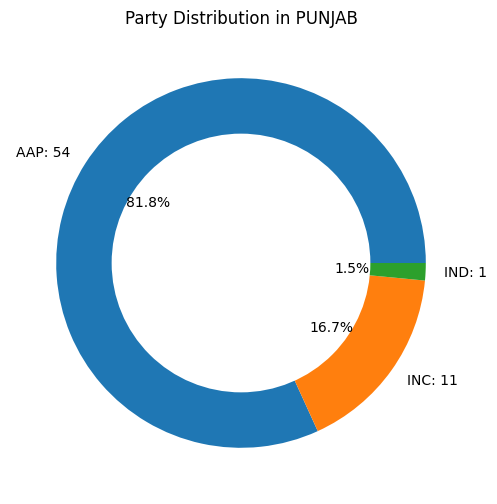

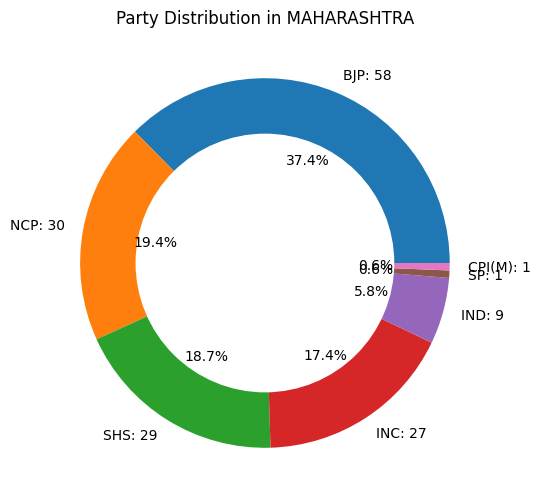

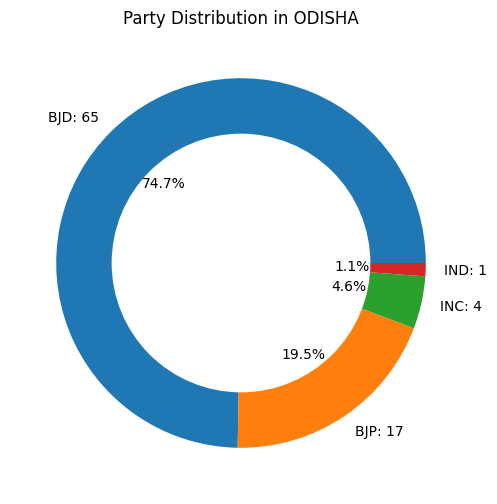

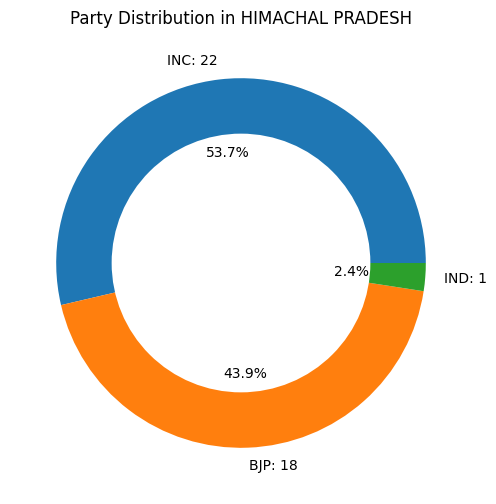

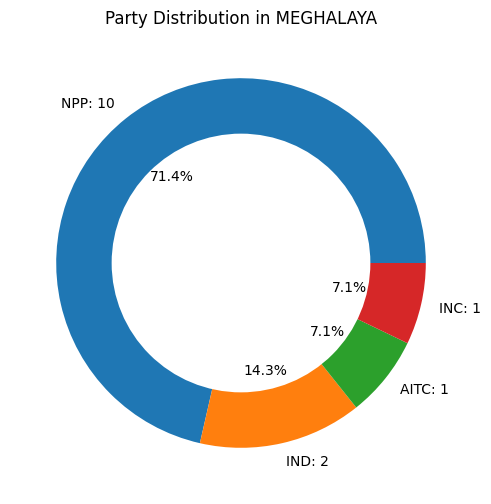

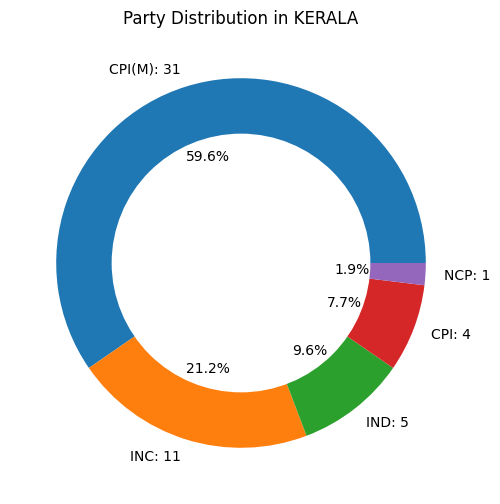

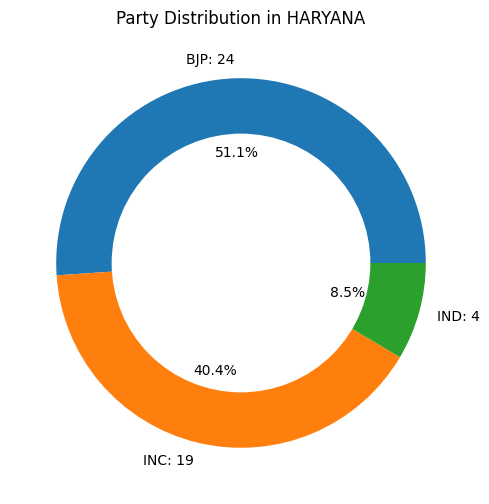

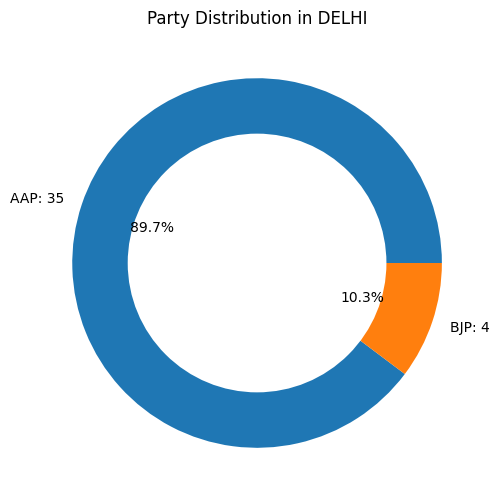

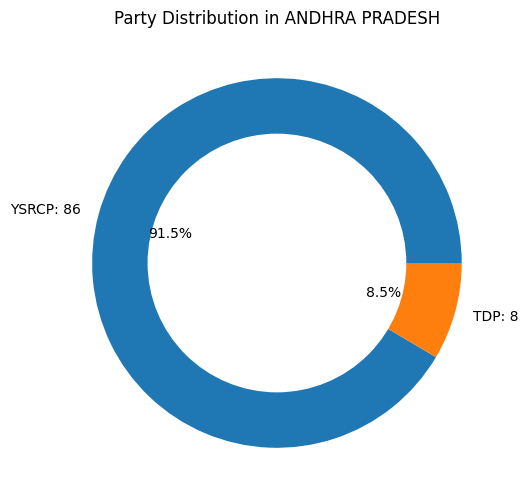

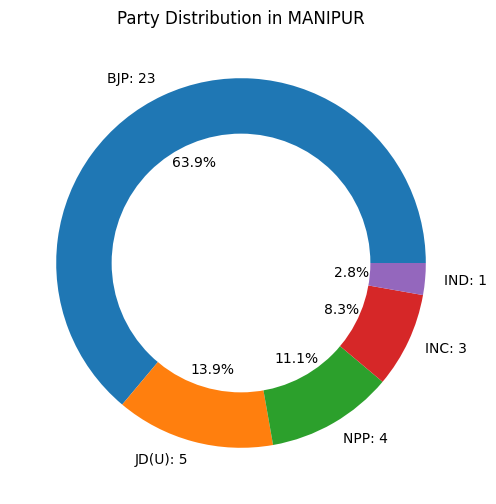

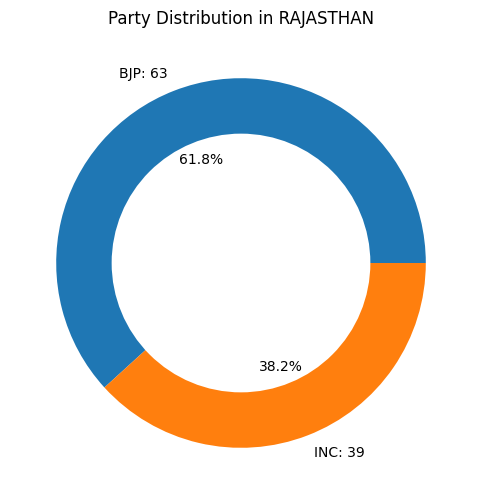

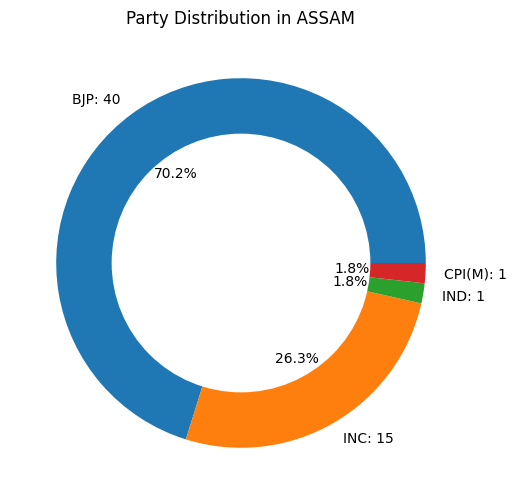

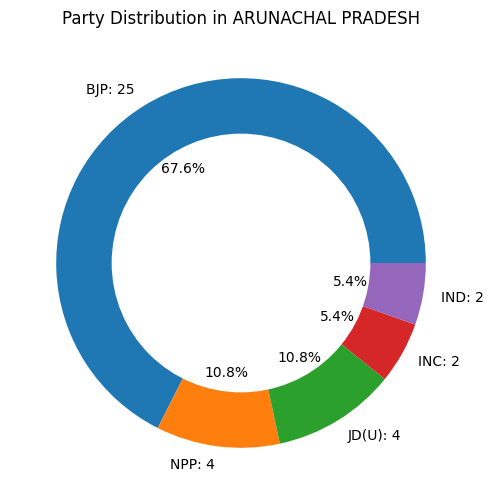

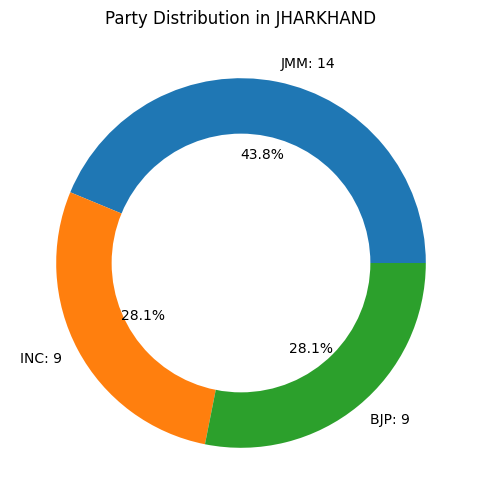

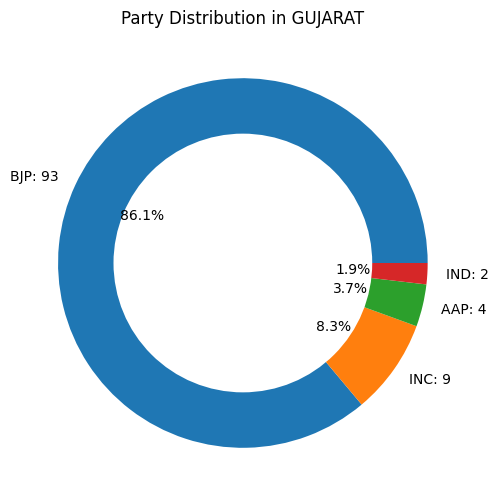

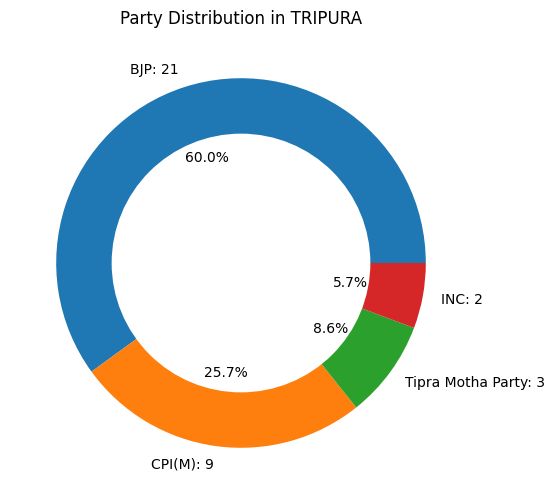

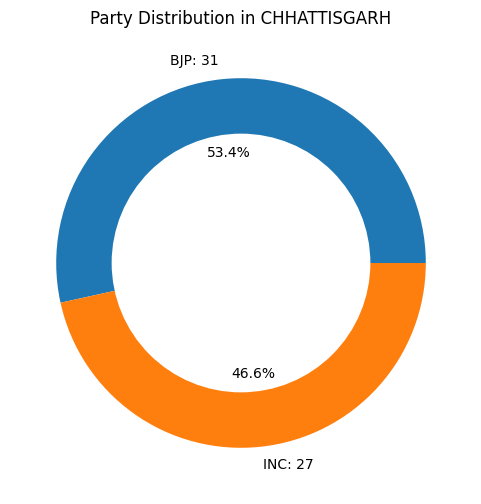

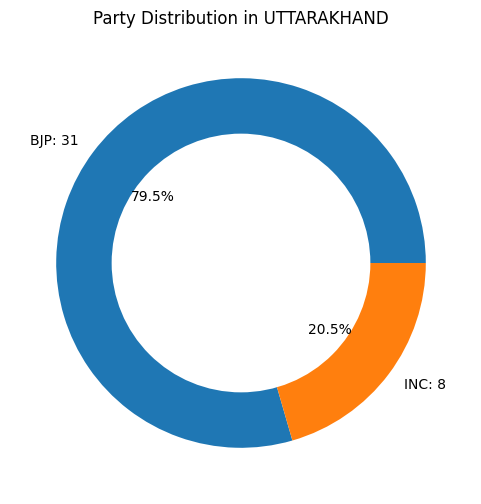

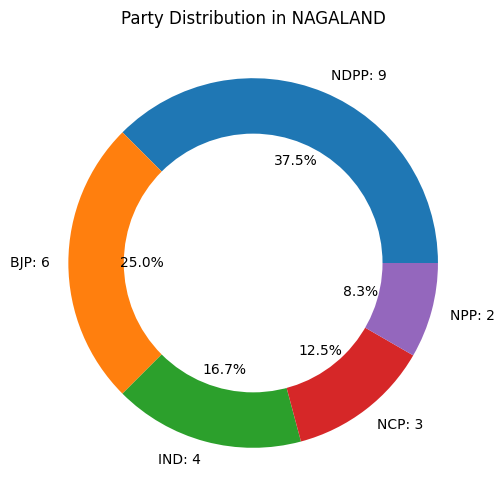

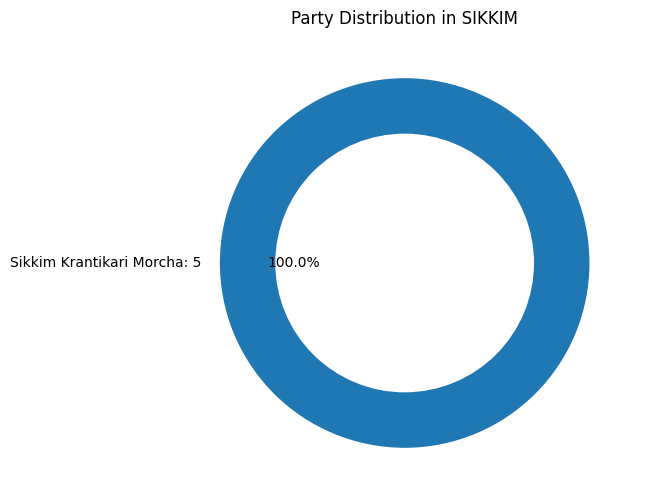

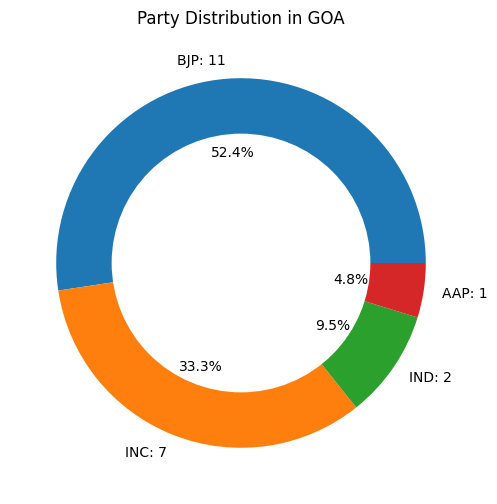

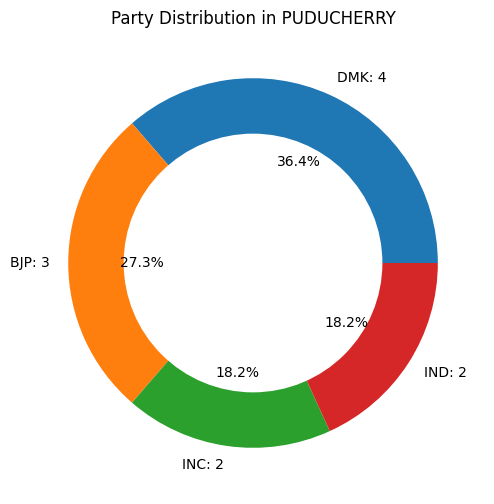

In [18]:
states = df['state'].unique()

for state in states:
    state_data = df[df['state'] == state]
    party_counts = state_data['Party'].value_counts()
    
    plt.figure(figsize=(6, 6))
    plt.pie(party_counts, labels=[f"{party}: {count}" for party, count in zip(party_counts.index, party_counts)], autopct='%1.1f%%', wedgeprops=dict(width=0.4))
    plt.title(f'Party Distribution in {state}')
    
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    plt.show()


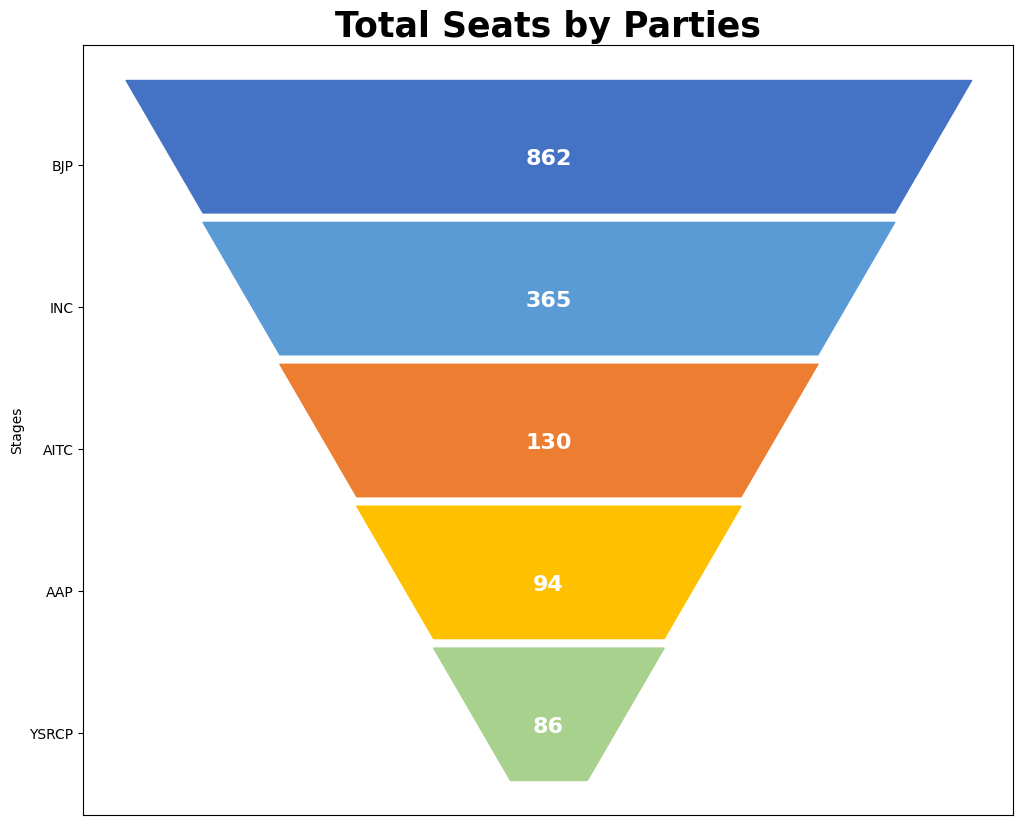

In [19]:
party_counts = df['Party'].value_counts()

top_5_parties = party_counts.head(5)

top_5_parties_df = pd.DataFrame({'Party': top_5_parties.index, 'Count': top_5_parties.values})


colors=['#a9d18e','#ffc000','#ed7d31','#5b9bd5','#4472c4']
plt.figure(figsize=(12, 10))
plt.style.context("fivethirtyeight")

plt.fill_betweenx(y=[1, 3.8], x1=[10, 12], x2=[8, 6], color=colors[0])
plt.fill_betweenx(y=[4, 6.8], x1=[12, 14], x2=[6, 4], color=colors[1])
plt.fill_betweenx(y=[7, 9.8], x1=[14, 16], x2=[4, 2], color=colors[2])
plt.fill_betweenx(y=[10, 12.8], x1=[16, 18], x2=[2, 0], color=colors[3])
plt.fill_betweenx(y=[13, 15.8], x1=[18, 20], x2=[0, -2], color=colors[4])

plt.xticks([], [])
plt.yticks([2, 5, 8, 11, 14], top_5_parties_df["Party"][::-1])

for y, value in zip([2, 5, 8, 11, 14], top_5_parties_df["Count"][::-1]):
    plt.text(9, y, value, fontsize=16, fontweight="bold", color="white", ha="center")

plt.grid(visible=False)
plt.ylabel("Stages")
plt.title("Total Seats by Parties", loc="center", fontsize=25, fontweight="bold")

plt.show()


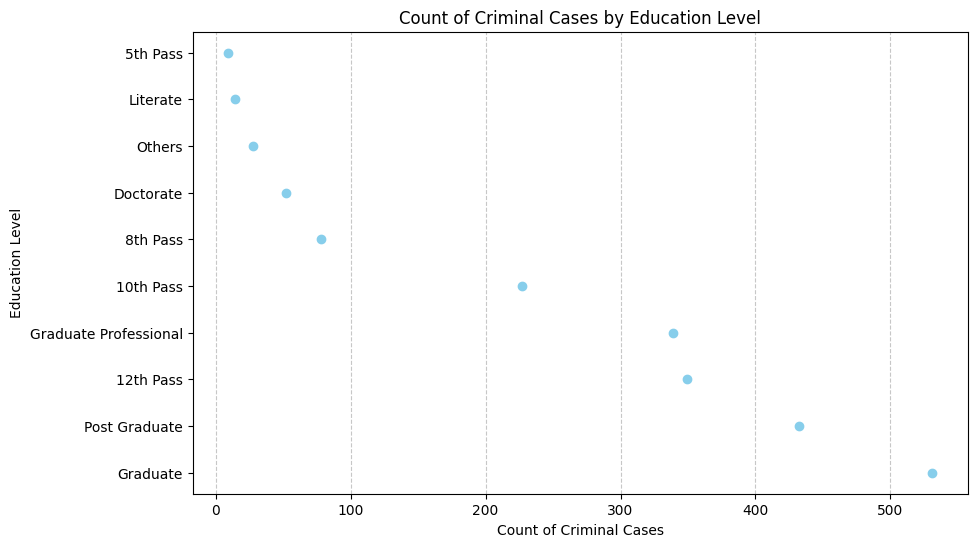

In [20]:
education_criminal_cases = df.groupby('Education')['Criminal Case'].count()

education_criminal_cases = education_criminal_cases.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.plot(education_criminal_cases, education_criminal_cases.index, 'o', color='skyblue')
plt.title('Count of Criminal Cases by Education Level')
plt.xlabel('Count of Criminal Cases')
plt.ylabel('Education Level')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


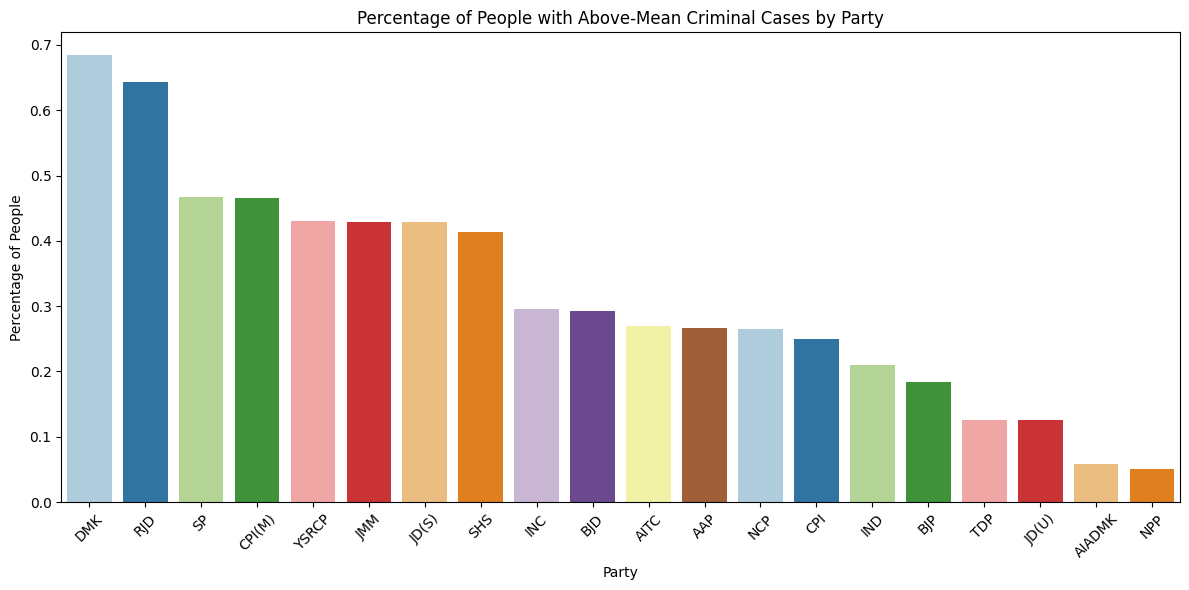

In [22]:
mean_cases= data['Criminal Case'].mean()
data['Above Mean Cases']=data['Criminal Case']> mean_cases
custom_palette = sns.color_palette("Paired")
party_percentage = data.groupby('Party')['Above Mean Cases'].mean().reset_index()
party_percentage = party_percentage.sort_values(by='Above Mean Cases', ascending=False)
party_percentage = party_percentage[party_percentage['Above Mean Cases'] > 0]
plt.figure(figsize=(12, 6))
sns.barplot(x='Party', y='Above Mean Cases', data=party_percentage, palette=custom_palette)
plt.title('Percentage of People with Above-Mean Criminal Cases by Party')
plt.xlabel('Party')
plt.ylabel('Percentage of People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
